In [2]:
%load_ext autoreload
%autoreload 2
%cd "~/deepshape/deepshape"

/home/jorgen/deepshape/deepshape


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
from layers import FourierLayer2D
from palais_layer import *
from surfaces import *
from visual import get_plot_data
from networks import ReparametrizationNetwork2D

In [70]:
import torch 
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

import time

In [10]:
?transforms.Normalize

In [14]:
transform = transforms.Compose( 
    [transforms.ToTensor(),
     transforms.Normalize(0, 0)])
trainset = torchvision.datasets.MNIST(root='../data', train=True,
                                        download=True, transform=transform)

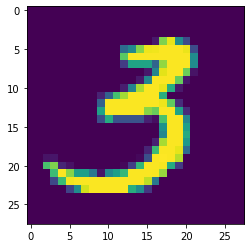

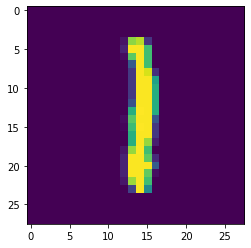

In [28]:
# Get random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
image1 = images[0].squeeze()
image2 = images[1].squeeze()

plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()

In [71]:
x = np.linspace(0, 1, 28)
f = RectBivariateSpline(x, x, image1)
x = np.linspace(0, 1, 28)
g = RectBivariateSpline(x, x, image2)

In [93]:
F = (
    lambda x: torch.Tensor(f(x[..., 0], x[..., 1], dx=1, grid=False)),
    lambda x: torch.Tensor(f(x[..., 0], x[..., 1], dy=1, grid=False)),
    lambda x: torch.Tensor(f(x[..., 0], x[..., 1], grid=False)),
#     lambda x: torch.zeros_like(x[..., 0])

)
F = Surface(F)

G = (
    lambda x: torch.Tensor(g(x[..., 0], x[..., 1], dx=1, grid=False)),
    lambda x: torch.Tensor(g(x[..., 0], x[..., 1], dy=1, grid=False)),
    lambda x: torch.Tensor(g(x[..., 0], x[..., 1], grid=False)),
#     lambda x: torch.zeros_like(x[..., 0])

)
G = Surface(G)
R = Qmap(G)

In [94]:
k=32
K = k**2
X = torch.rand(K, 2)

X, Y = torch.meshgrid((torch.linspace(0, 1, k), torch.linspace(0, 1, k)))
X, Y = X.reshape(-1, 1), Y.reshape(-1, 1)

X = torch.cat((X, Y), dim=1)

In [97]:
%matplotlib qt

In [98]:
k = 128
Z = get_plot_data(F, k=k)
fcolors = get_plot_data(F.volume_factor, k=k).squeeze()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(*Z, rstride=2, cstride=2)
ax.view_init(35, 225)
# plt.savefig(figdir + "surface-starting.pdf")
plt.show()

In [101]:
# Instantiate a L-layer network with N basis functions per layer.
RN = ReparametrizationNetwork2D(2, 10, layer_type=PalaisLayer2D)

# opt = optim.Adam(RN.parameters(), lr=1e-3)
opt = optim.SGD(RN.parameters(), lr=1e-3, momentum=0.5)
# opt = optim.RMSprop(RN.parameters(), lr=1e-4)

error = RN.train(Q, R, opt, iterations=500, nxpoints=32, printiter=10, epsilon=1e-2, delta=1e-3)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.